In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from extract_data import extract_data
from transform_data import transform_data

%matplotlib inline

In [84]:
df_raw = extract_data()
df = transform_data(df_raw)
df.head(10)

✅ Connected!


c:\Users\pc\OneDrive - Computer and Information Technology (Menofia University)\Desktop\python\.project\extract_data.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,StudentID,First_Name,Middle_Name,Last_Name,DOB,Address,Gender,SupervisorID,Age
0,1,Mohamed,Hamed,Supervisor,2000-01-01,Alex,M,0,25.0
1,2,Ahmed,Ayman,Ahmed,2001-02-02,Cairo,M,1,24.0
2,3,Ali,Karim,Ali,1990-02-02,Alex,M,1,35.0
3,4,Adel,Wael,Ayman,2007-07-09,Cairo,M,1,18.0
4,6,Ahmed,Wael,Wael,1980-09-07,Alex,M,1,45.0
5,7,Noha,Mohamed,Zaki,2007-07-09,Cairo,M,1,18.0
6,8,Ans,Ibrahim,Elsayed,1980-09-07,Cairo,M,1,45.0
7,9,Mazen,Mohamed,Ibrahim,1990-02-02,Alex,M,1,35.0
8,10,Ehab,Ayman,Karim,1980-09-07,Cairo,M,1,45.0
9,11,Noha,Mahmoud,Ayman,1980-09-07,Cairo,F,7,45.0


In [85]:
sns.set(style = "whitegrid")
from matplotlib.colors import ListedColormap
cust_color = [
    '#6ee1fa',
    '#65d4ee',
    '#5cc6e3',
    '#54b9d7',
    '#4caccb',
    '#449fbf',
    '#3c93b3',
    '#3586a7',
    '#2d7a9b',
    '#266e8f',
    '#1f6282',
    '#175776',
    '#104c6b',
    '#07415f',
    '#003653'
]

cmap = ListedColormap(cust_color)

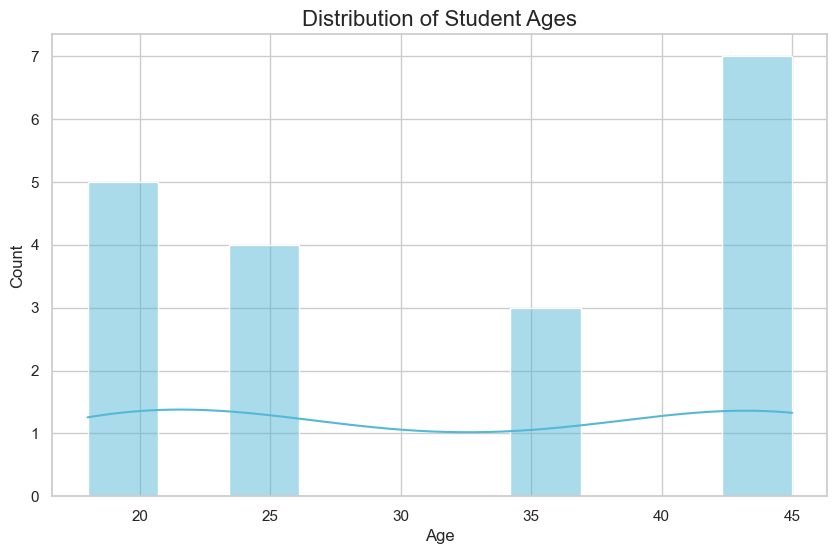

In [86]:
plt.figure(figsize = (10,6))
sns.histplot(df['Age'].dropna(), bins = 10 , kde = True , color = cust_color[3])
plt.title('Distribution of Student Ages', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_31244\3858620562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = df, palette = 'cool')


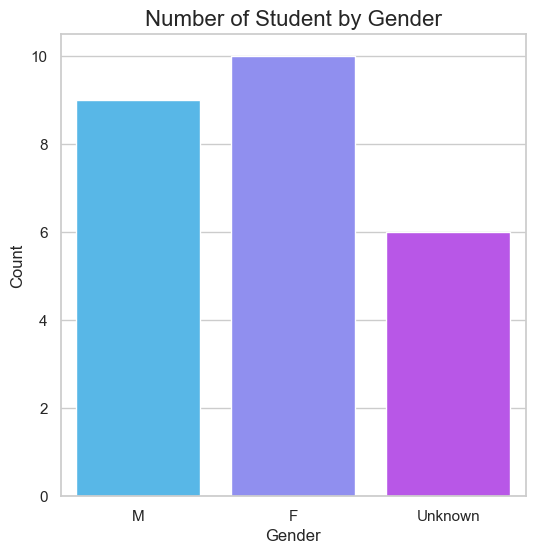

In [87]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Gender', data = df, palette = 'cool')
plt.title('Number of Student by Gender', fontsize = 16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_31244\467362717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Address',


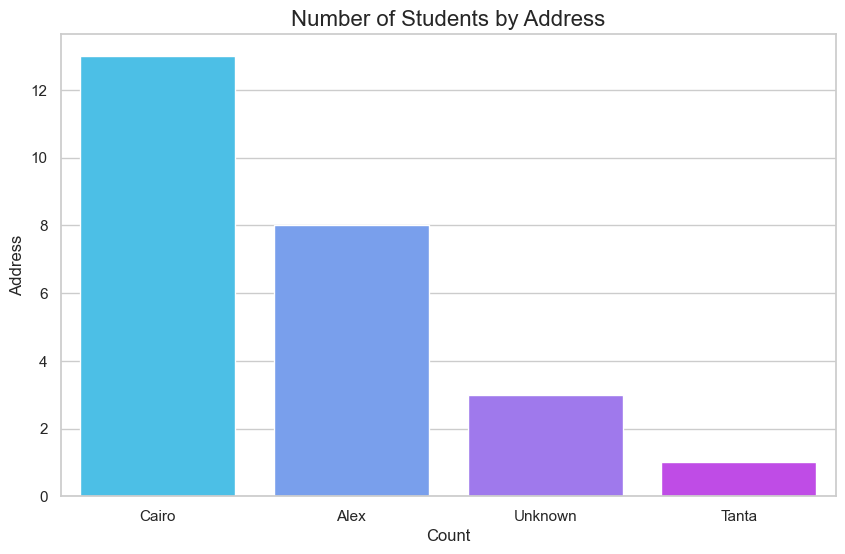

In [88]:
plt.figure(figsize = (10,6))
sns.countplot(x='Address', 
              data = df, 
              palette = 'cool', 
              order = df['Address'].value_counts().index)
plt.title('Number of Students by Address', fontsize = 16)
plt.xlabel('Count')
plt.ylabel('Address')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_31244\595448216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


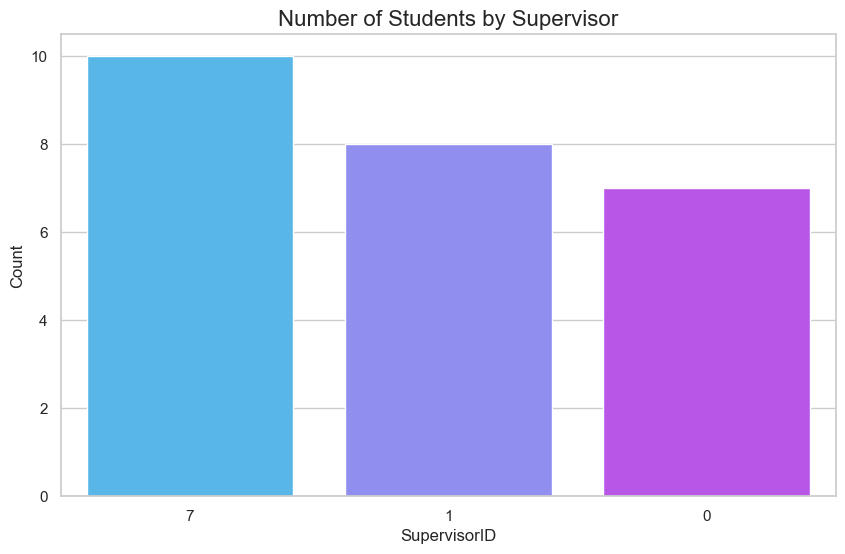

In [89]:
plt.figure(figsize = (10,6))
sns.countplot(
    x = 'SupervisorID',
    data = df,
    palette = 'cool',
    order = df['SupervisorID'].value_counts().index
)
plt.title('Number of Students by Supervisor', fontsize = 16)
plt.xlabel('SupervisorID')
plt.ylabel('Count')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_31244\2445752549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Gender'].value_counts().index,


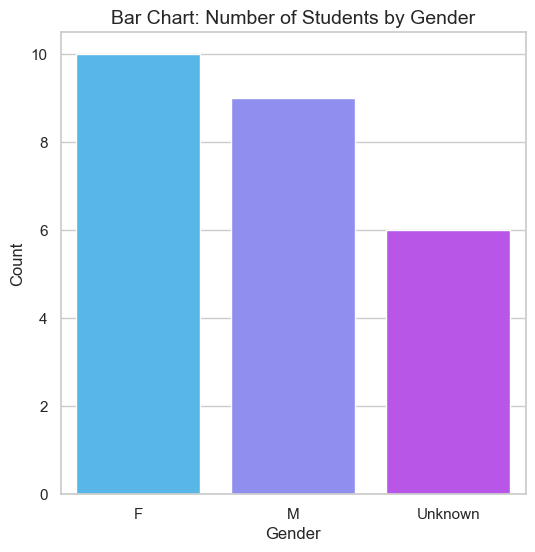

In [90]:
plt.figure(figsize = (6,6))
sns.barplot(x = df['Gender'].value_counts().index, 
            y = df['Gender'].value_counts(), palette = 'cool')
plt.title('Bar Chart: Number of Students by Gender', fontsize = 14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

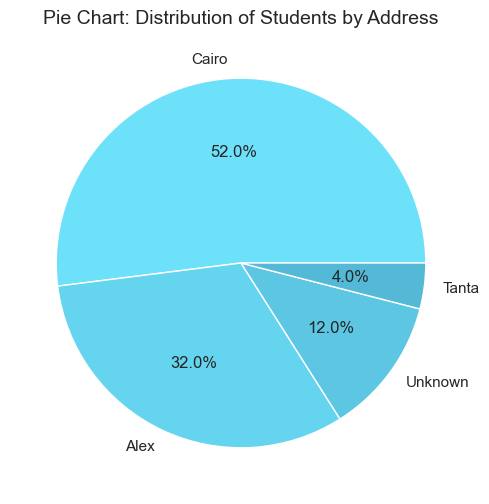

In [91]:
plt.figure(figsize = (6,6))
plt.pie(df['Address'].value_counts(),
        labels = df['Address'].value_counts().index,
        autopct = '%1.1f%%', 
        colors = cust_color[:df['Address'].nunique()])
plt.title('Pie Chart: Distribution of Students by Address', fontsize = 14)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_31244\1932729796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Gender', y = 'Age', data = df, palette = 'cool')


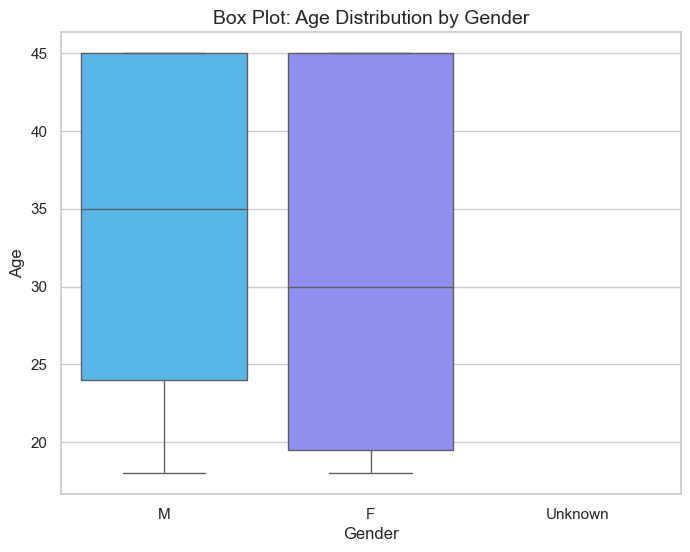

In [92]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Gender', y = 'Age', data = df, palette = 'cool')
plt.title('Box Plot: Age Distribution by Gender', fontsize = 14)
plt.show()

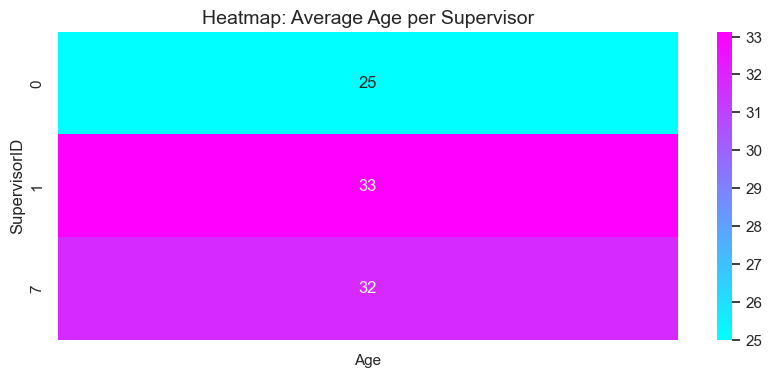

In [93]:
age_supervisor = df.pivot_table(values = 'Age', index = 'SupervisorID',
                                aggfunc = 'mean')
plt.figure(figsize = (10,4))
sns.heatmap(age_supervisor, annot = True, cmap = 'cool', cbar = True)
plt.title('Heatmap: Average Age per Supervisor', fontsize = 14)
plt.show()

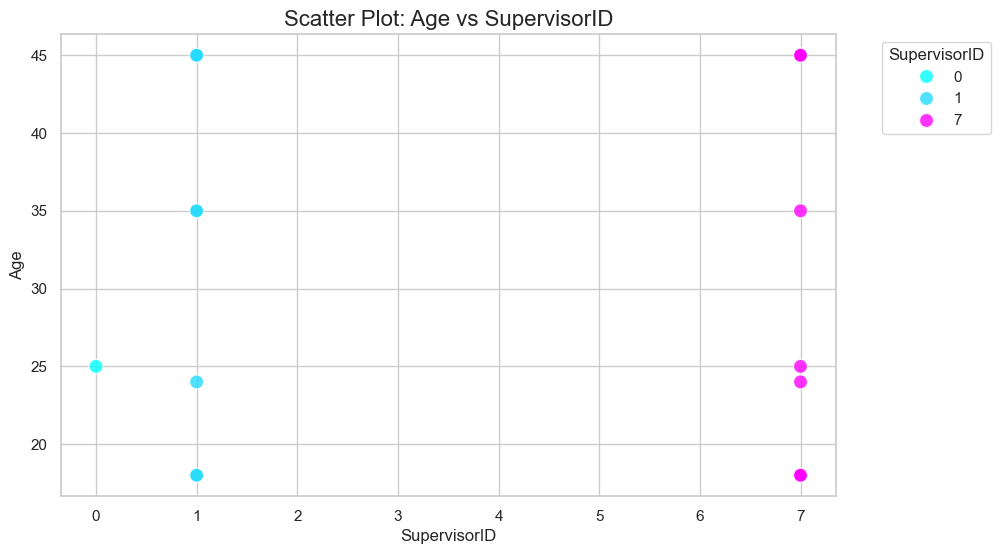

In [94]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'SupervisorID',
                y = 'Age',
                data = df,
                hue = 'SupervisorID',
                palette = 'cool',
                s = 100,
                alpha = 0.8)
plt.title('Scatter Plot: Age vs SupervisorID', fontsize = 16)
plt.xlabel('SupervisorID')
plt.ylabel('Age')
plt.legend(title = 'SupervisorID', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

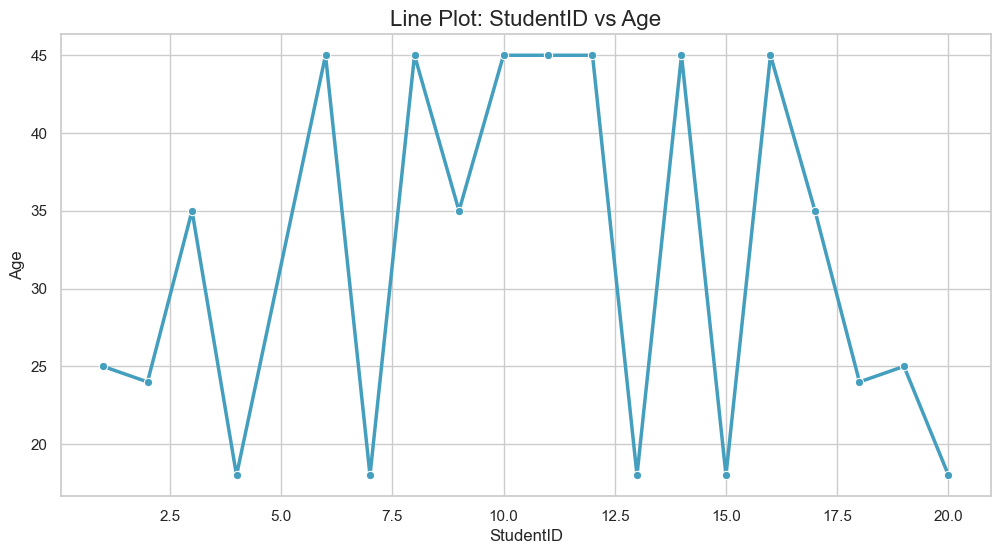

In [95]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'StudentID',
             y = 'Age',
             data = df.sort_values('StudentID'),
             color = cust_color[5],
             linewidth = 2.5,
             marker = 'o')
plt.title('Line Plot: StudentID vs Age', fontsize = 16)
plt.xlabel('StudentID')
plt.ylabel('Age')
plt.show()